In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('algerian_fire_cleaned.csv')

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
# we don't need day, month ,year column so we will remove it
data.drop(['day','month','year'],axis = 1 ,inplace = True)

In [5]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
data['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
data['Classes'] = np.where(data['Classes'].str.contains('not fire'),0,1)

In [8]:
data['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [9]:
X = data.drop('FWI',axis = 1)
y = data.loc[:,'FWI']

In [10]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [11]:
# train test split 
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [13]:
X_train.shape,y_train.shape

((170, 11), (170,))

In [14]:
X_test.shape,y_test.shape

((73, 11), (73,))

In [15]:
# feature selection based on correlation

X.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.586639,0.089408
Classes,0.516015,-0.432161,-0.069964,-0.379097,0.769492,0.585658,0.511123,0.735197,0.586639,1.000000,0.162347


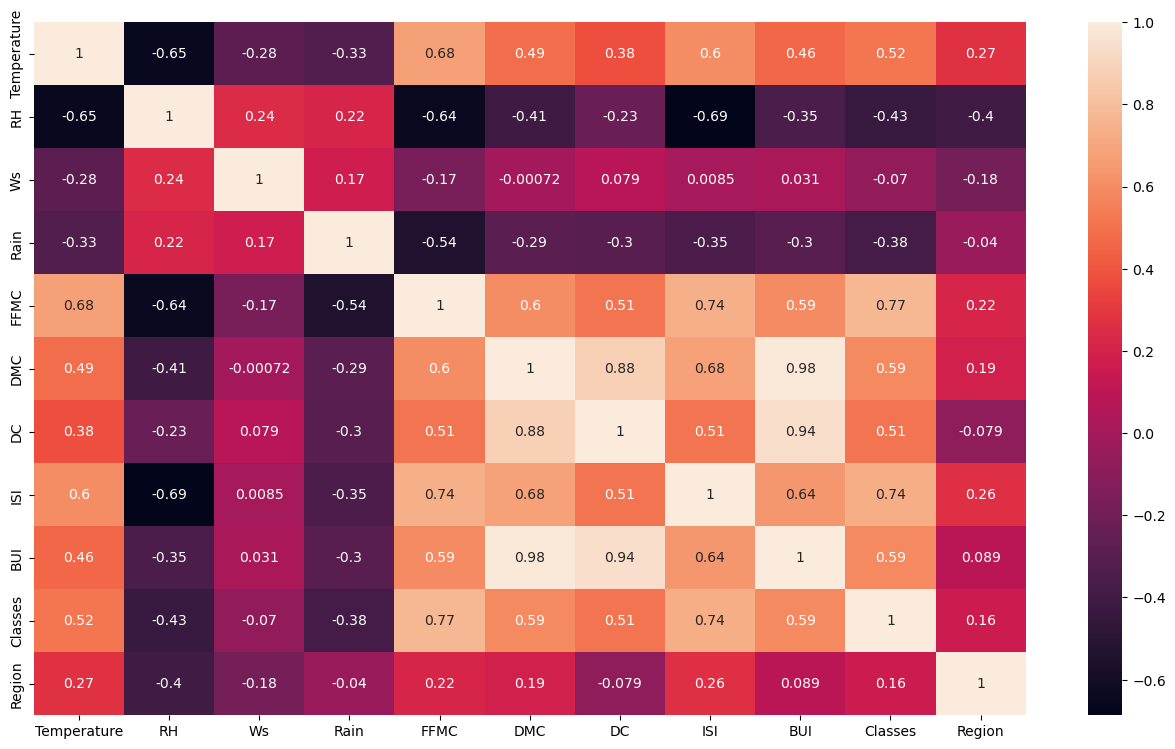

In [16]:
plt.figure(figsize = (16,9))

sns.heatmap(X.corr(),annot = True)
plt.show()

In [17]:
# removing highly positively correlated columns

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for k in range(i):
            if abs(corr_matrix.iloc[i, k]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)

    return col_corr

                

In [18]:
# threshold we will be given by stakeholders
high_corr=correlation(X_train,0.85)
high_corr

{'BUI', 'DC'}

In [65]:
X_train.drop(high_corr,axis = 1 , inplace = True)
X_test.drop(high_corr,axis = 1 , inplace = True)

In [20]:
X_train.shape,X_test.shape

((170, 11), (73, 11))

In [67]:
X_train.shape,X_test.shape

((170, 9), (73, 9))

In [70]:
# standardization of the feature

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

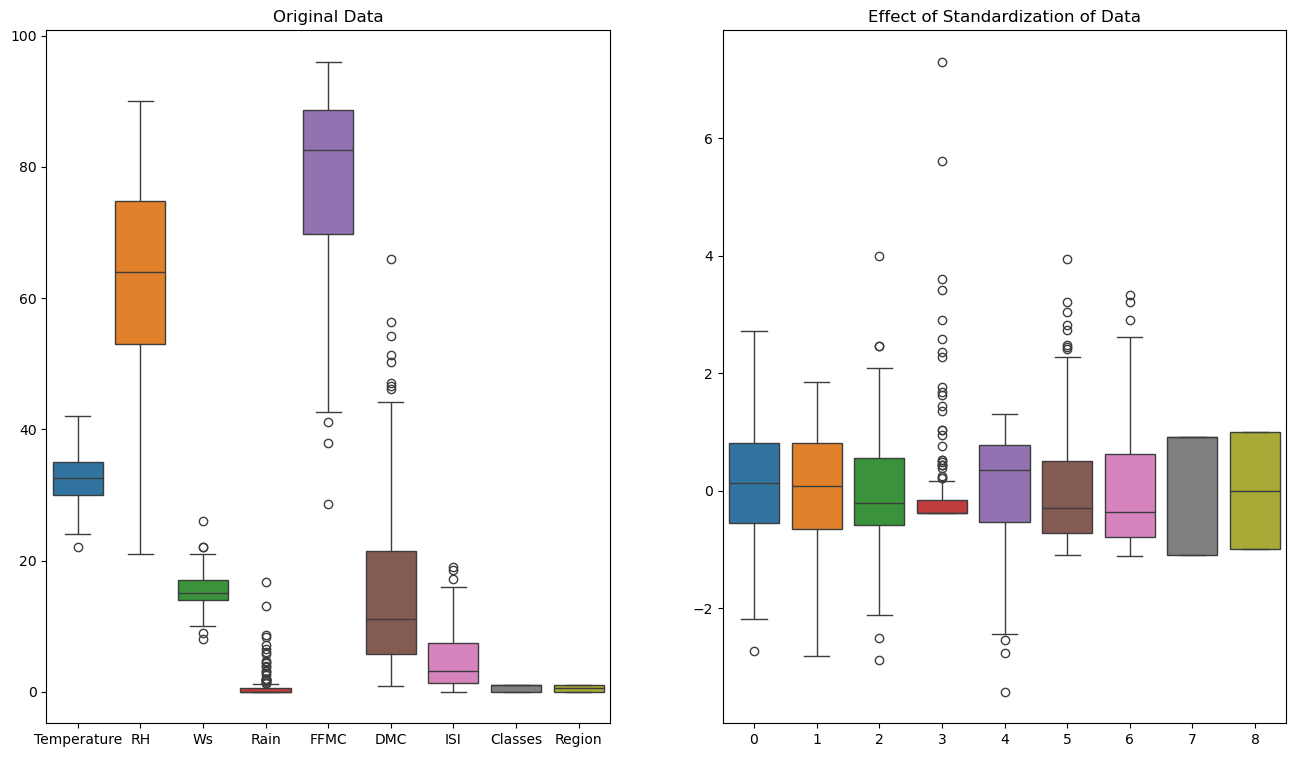

In [78]:
# boxplots to understand the effects of the standardizatin

plt.figure(figsize=(16, 9))

# Original data
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('Original Data')

# Scaled data
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('Effect of Standardization of Data')

plt.show()


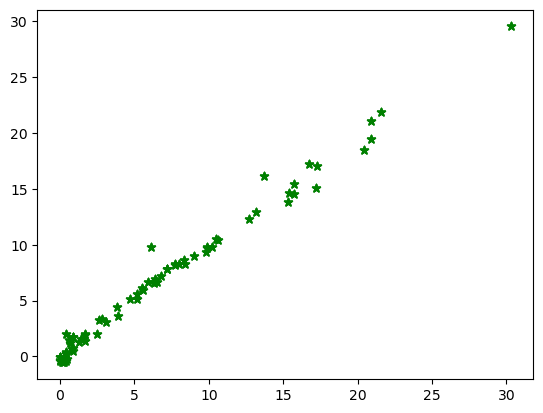

In [88]:
# Model Training

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,r2_score



model = LinearRegression()
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)

error_score = mean_absolute_error(y_test,y_pred)
r_score = r2_score(y_test,y_pred)

plt.scatter(y_test,y_pred,color = 'g',marker = '*')

plt.show()







In [84]:

print('mae is:',error_score)
print('r_score:', r_score)




mae is: 0.5648036371485099
r_score: 0.9847206874554417


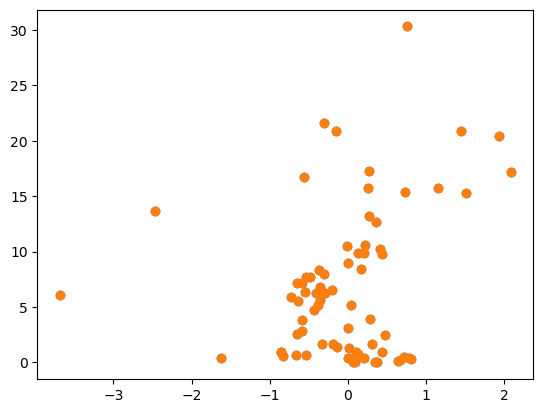

In [94]:
# residual plot
residual = y_test - y_pred
plt.scatter(residual,y_test)
plt.show()

| Residual Pattern                     | Meaning                                                                 |
| ------------------------------------ | ----------------------------------------------------------------------- |
| **Random scatter around zero**       | Good fit — linear model assumptions hold.                               |
| **Curved pattern (U-shape)**         | Non-linearity — consider polynomial or non-linear model.                |
| **Funnel shape (widening variance)** | Heteroscedasticity — errors not constant; consider transformation.      |
| **Trend over time**                  | Autocorrelation — use time-series methods or add time-related features. |
| **Isolated distant point**           | Outlier/influential point — may distort the model.                      |


# Lasso Regression

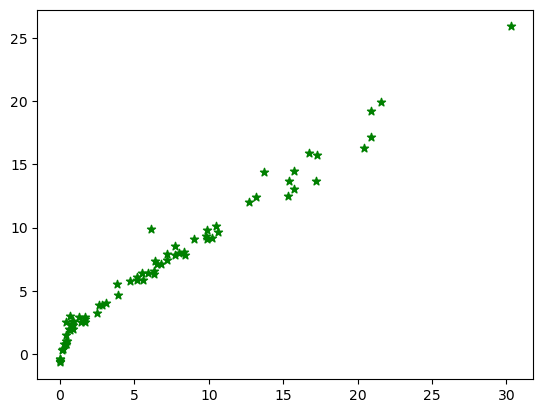

In [102]:
# Model Training

from sklearn.linear_model import Lasso

from sklearn.metrics import mean_absolute_error,r2_score



Lasso = Lasso()
Lasso.fit(X_train_scaled,y_train)

y_pred = Lasso.predict(X_test_scaled)

lasso_error_score = mean_absolute_error(y_test,y_pred)
lasso_r_score = r2_score(y_test,y_pred)

plt.scatter(y_test,y_pred,color = 'g',marker = '*')

plt.show()







In [105]:

print('mae is:',lasso_error_score)
print('r_score:', lasso_r_score)


mae is: 1.120336888239321
r_score: 0.9511364350928344


# Lasso Cv

In [123]:
from sklearn.linear_model import LassoCV

In [125]:
lassocv = LassoCV(cv= 5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [239]:
lassocv.alphas_,len(lassocv.alphas_)

(array([7.1027424 , 6.62404134, 6.17760312, 5.76125335, 5.37296415,
        5.01084435, 4.67313021, 4.35817688, 4.06445034, 3.79051999,
        3.53505163, 3.29680098, 3.07460763, 2.86738937, 2.67413692,
        2.49390904, 2.32582792, 2.1690749 , 2.02288651, 1.88655073,
        1.75940353, 1.64082562, 1.53023946, 1.42710644, 1.33092425,
        1.24122441, 1.15757004, 1.07955369, 1.00679538, 0.93894074,
        0.87565928, 0.81664278, 0.76160379, 0.71027424, 0.66240413,
        0.61776031, 0.57612533, 0.53729642, 0.50108444, 0.46731302,
        0.43581769, 0.40644503, 0.379052  , 0.35350516, 0.3296801 ,
        0.30746076, 0.28673894, 0.26741369, 0.2493909 , 0.23258279,
        0.21690749, 0.20228865, 0.18865507, 0.17594035, 0.16408256,
        0.15302395, 0.14271064, 0.13309242, 0.12412244, 0.115757  ,
        0.10795537, 0.10067954, 0.09389407, 0.08756593, 0.08166428,
        0.07616038, 0.07102742, 0.06624041, 0.06177603, 0.05761253,
        0.05372964, 0.05010844, 0.0467313 , 0.04

In [127]:
lassocv.alpha_ # the alpha after many maniterations

0.061776031206820514

In [133]:
lassocv.mse_path_ # gives mse for every iteration

array([[50.65386968, 76.54197718, 42.60540011, 85.19903601, 37.22447771],
       [44.75111814, 74.82132255, 38.341692  , 85.19903601, 33.05643554],
       [39.36934038, 67.35349762, 32.91718118, 77.16947646, 28.98441557],
       [34.66809152, 60.76849885, 28.30179163, 70.00628728, 25.07891899],
       [30.56005987, 54.39656706, 24.38332378, 63.69553448, 21.70030699],
       [26.96916466, 47.86216351, 21.06462063, 58.13161794, 18.77862509],
       [23.82945553, 42.15575307, 18.26138649, 53.22232605, 16.25301222],
       [21.08318369, 37.17090521, 15.90095328, 46.89293347, 14.07124316],
       [18.68014904, 32.81473426, 13.92043855, 41.32635877, 12.18732916],
       [16.57661964, 29.00744813, 12.26540003, 36.4658746 , 10.56155236],
       [14.73438066, 25.67846082, 10.88893934, 32.22081976,  9.15943046],
       [13.12047322, 22.76665973,  9.75047302, 28.5122238 ,  7.95103045],
       [11.70583482, 20.21881242,  8.81511714, 25.27132199,  6.9102242 ],
       [10.46524798, 17.98854548,  8.0

'r2 score'

0.9821627684487946

'error score'

0.6356015744517415

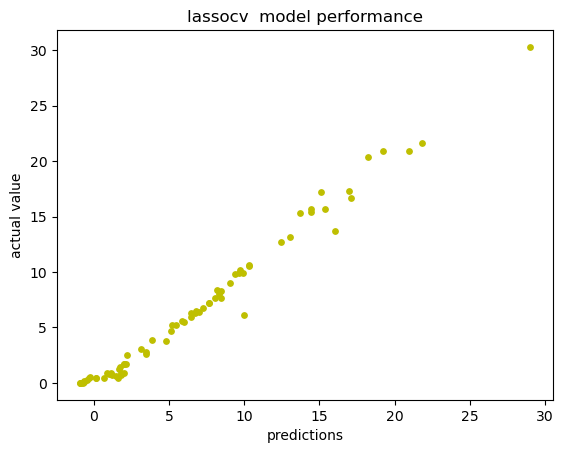

In [229]:
y_pred = lassocv.predict(X_test_scaled)

lassocv_r2 = r2_score(y_test,y_pred)
lassocv_mae = mean_absolute_error(y_test,y_pred)
display('r2 score',lassocv_r2,'error score',lassocv_mae)


plt.scatter(y_pred,y_test,marker = '.',color = 'y',s = 60)
plt.title('lassocv  model performance')
plt.xlabel('predictions')
plt.ylabel('actual value')
plt.show()


In [107]:
# score is reduced doesn't mean our model is not good porbably previous model may be overfitted

# Ridge Regression

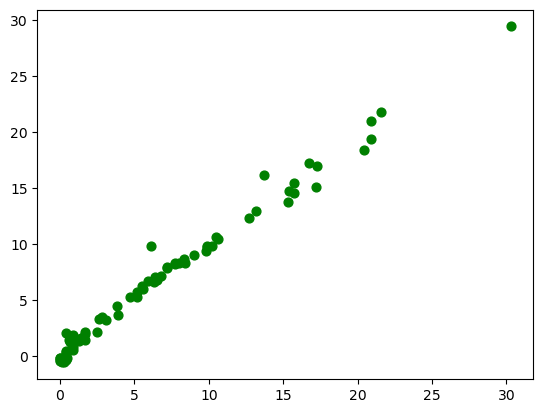

In [231]:
# Model Training

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error,r2_score



Ridge = Ridge()
Ridge.fit(X_train_scaled,y_train)

y_pred = Ridge.predict(X_test_scaled)

ridge_error_score = mean_absolute_error(y_test,y_pred)
ridge_r_score = r2_score(y_test,y_pred)

plt.scatter(y_test,y_pred,color = 'g',marker = 'o',s = 40)

plt.show()







In [114]:

print('mae is:',ridge_error_score)
print('r_score:', ridge_r_score)

mae is: 0.5844876727578043
r_score: 0.9841610358272455


In [153]:
from sklearn.linear_model import RidgeCV

In [165]:
ridgecv = RidgeCV()
ridgecv.fit(X_train_scaled,y_train)

RidgeCV()

In [167]:
ridgecv_y_pred = ridgecv.predict(X_test_scaled)

'r2 score'

0.9821627684487946

'error score'

0.6356015744517415

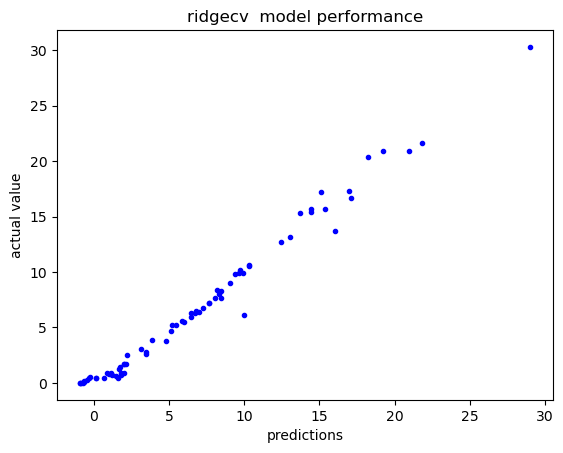

In [183]:
ridgecv_r2 = r2_score(y_test,y_pred)
ridgecv_mae = mean_absolute_error(y_test,y_pred)
display('r2 score',ridgecv_r2,'error score',ridgecv_mae)

plt.scatter(y_pred,y_test,marker = '.',color = 'b')
plt.title('ridgecv  model performance')
plt.xlabel('predictions')
plt.ylabel('actual value') 
plt.show()

In [189]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [ ]:
# Elastic NET

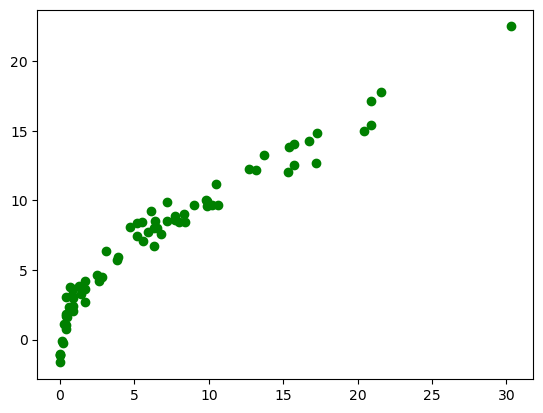

In [118]:
# Model Training

from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_absolute_error,r2_score



Elastic = ElasticNet()
Elastic.fit(X_train_scaled,y_train)

y_pred = Elastic.predict(X_test_scaled)

elastic_error_score = mean_absolute_error(y_test,y_pred)
elastic_r_score = r2_score(y_test,y_pred)

plt.scatter(y_test,y_pred,color = 'g',marker = 'o')

plt.show()







In [120]:

print('mae is:',elastic_error_score)
print('r_score:', elastic_r_score)

mae is: 1.8554687479717555
r_score: 0.8804077479376988


In [204]:
from sklearn.linear_model import ElasticNetCV

In [206]:
encv = ElasticNetCV()

In [208]:
encv.fit(X_train_scaled,y_train)

ElasticNetCV()

In [210]:
encv_y_pred = encv.predict(X_test_scaled)

'r2 score'

0.9821627684487946

'error score'

0.6856401038998684

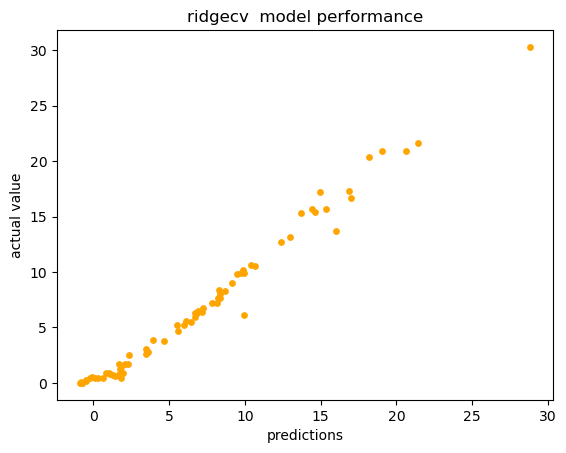

In [225]:
encv_r2 = r2_score(y_test,y_pred)
encv_mae = mean_absolute_error(y_test,encv_y_pred)
display('r2 score',encv_r2,'error score',encv_mae)

plt.scatter(encv_y_pred,y_test,marker = '.',color = 'orange',s = 60)
plt.title('ridgecv  model performance')
plt.xlabel('predictions')
plt.ylabel('actual value')
plt.show()

In [233]:
encv.alpha_

0.04987818082990675